In [186]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns

In [ ]:
rockA = pd.read_csv('rock/Accelerometer.csv')
rockG = pd.read_csv('rock/Gyroscope.csv')
popA = pd.read_csv('pop/Accelerometer.csv')
popG = pd.read_csv('pop/Gyroscope.csv')
jazzA = pd.read_csv('jazz/Accelerometer.csv')
jazzG = pd.read_csv('jazz/Gyroscope.csv')
edmA = pd.read_csv('edm/Accelerometer.csv')
edmG = pd.read_csv('edm/Gyroscope.csv')
lofiA = pd.read_csv('lofi/Accelerometer.csv')
lofiG = pd.read_csv('lofi/Gyroscope.csv')



### Aggregating data so that each column has a 0.25s interval

In [ ]:
rockA['Time (s)'] = pd.to_datetime(rockA['Time (s)'], unit='s')
rockA.set_index('Time (s)', inplace=True)
rockA = rockA.resample('0.25S').mean()
rockA.reset_index(inplace=True)

rockG['Time (s)'] = pd.to_datetime(rockG['Time (s)'], unit='s')
rockG.set_index('Time (s)', inplace=True)
rockG = rockG.resample('0.25S').mean()
rockG.reset_index(inplace=True)

popA['Time (s)'] = pd.to_datetime(popA['Time (s)'], unit='s')
popA.set_index('Time (s)', inplace=True)
popA = popA.resample('0.25S').mean()
popA.reset_index(inplace=True)

popG['Time (s)'] = pd.to_datetime(popG['Time (s)'], unit='s')
popG.set_index('Time (s)', inplace=True)
popG = popG.resample('0.25S').mean()
popG.reset_index(inplace=True)

jazzA['Time (s)'] = pd.to_datetime(jazzA['Time (s)'], unit='s')
jazzA.set_index('Time (s)', inplace=True)
jazzA = jazzA.resample('0.25S').mean()
jazzA.reset_index(inplace=True)

jazzG['Time (s)'] = pd.to_datetime(jazzG['Time (s)'], unit='s')
jazzG.set_index('Time (s)', inplace=True)
jazzG = jazzG.resample('0.25S').mean()
jazzG.reset_index(inplace=True)

edmA['Time (s)'] = pd.to_datetime(edmA['Time (s)'], unit='s')
edmA.set_index('Time (s)', inplace=True)
edmA = edmA.resample('0.25S').mean()
edmA.reset_index(inplace=True)

edmG['Time (s)'] = pd.to_datetime(edmG['Time (s)'], unit='s')
edmG.set_index('Time (s)', inplace=True)
edmG = edmG.resample('0.25S').mean()
edmG.reset_index(inplace=True)

lofiA['Time (s)'] = pd.to_datetime(lofiA['Time (s)'], unit='s')
lofiA.set_index('Time (s)', inplace=True)
lofiA = lofiA.resample('0.25S').mean()
lofiA.reset_index(inplace=True)

lofiG['Time (s)'] = pd.to_datetime(lofiG['Time (s)'], unit='s')
lofiG.set_index('Time (s)', inplace=True)
lofiG = lofiG.resample('0.25S').mean()
lofiG.reset_index(inplace=True)

# rockA['Genre'] = 'rock'
rockG['Genre'] = 'rock'
# popA['Genre'] = 'pop'
popG['Genre'] = 'pop'
# jazzA['Genre'] = 'jazz'
jazzG['Genre'] = 'jazz'
# edmA['Genre'] = 'edm'
edmG['Genre'] = 'edm'
# lofiA['Genre'] = 'lofi'
lofiG['Genre'] = 'lofi'

rockG.drop('Time (s)', axis=1, inplace=True)
popG.drop('Time (s)', axis=1, inplace=True)
jazzG.drop('Time (s)', axis=1, inplace=True)
edmG.drop('Time (s)', axis=1, inplace=True)
lofiG.drop('Time (s)', axis=1, inplace=True)




### Combining Accelerometer and Gyroscope datasets Horizontally and then Vertically

In [ ]:
rock_combined = pd.concat([rockA, rockG], axis=1)
pop_combined = pd.concat([popA, popG], axis=1)
jazz_combined = pd.concat([jazzA, jazzG], axis=1)
edm_combined = pd.concat([edmA, edmG], axis=1)
lofi_combined = pd.concat([lofiA, lofiG], axis=1)

combined_df = pd.concat([rock_combined, pop_combined, jazz_combined, edm_combined, lofi_combined], axis=0)
# combined_df.to_excel('filename.xlsx', index=False)




### Converting datetime format to hours minutes and seconds

In [ ]:
# df=pd.read_excel('filename1.xlsx')
# df['Time (s)'] = df['Time (s)'].dt.strftime('%H:%M:%S.%f')
# df.to_csv('dataset.csv',index=False)

In [ ]:
df = pd.read_csv('dataset.csv')
df

In [ ]:
df.describe(include='object')

In [ ]:
# plot each feature against the time column

import matplotlib.pyplot as plt
import seaborn as sns

# plot each feature against the time column
for col in df.columns:
    if col != 'Time (s)':
        plt.figure(figsize=(20, 5))
        plt.plot(df['Time (s)'], df[col])
        plt.title(col)
        plt.show()


### Adding Net Acceleration and Angular Velocity

In [10]:
df['Acceleration Net'] = (df['Acceleration x (m/s^2)']**2 + df['Acceleration y (m/s^2)']**2 + df['Acceleration z (m/s^2)']**2)**0.5
df['Gyro Net'] = (df['Gyroscope x (rad/s)']**2 + df['Gyroscope y (rad/s)']**2 + df['Gyroscope z (rad/s)']**2)**0.5

In [11]:
df

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Genre,BPM,Acceleration Net,Gyro Net
0,00:00:00.000000,-1.563384,3.703485,8.927862,-0.269163,-0.215996,0.037011,rock,173,9.791154,0.347092
1,00:00:00.250000,-0.832034,2.618059,9.157848,-0.275456,0.300962,-0.007585,rock,173,9.560999,0.408059
2,00:00:00.500000,-1.978007,2.809231,9.223699,-0.055587,-0.296234,-0.348594,rock,173,9.842810,0.460828
3,00:00:00.750000,-1.394112,1.944860,9.228296,0.187295,-0.638973,-0.304613,rock,173,9.533492,0.732226
4,00:00:01.000000,1.404846,2.322332,9.494185,0.267072,-1.329970,0.142612,rock,173,9.874531,1.363996
...,...,...,...,...,...,...,...,...,...,...,...
18624,00:14:00.250000,1.402597,4.288324,8.840542,0.099436,0.289380,0.141558,lofi,79,9.925330,0.337145
18625,00:14:00.500000,0.938983,4.361283,8.856370,0.072526,0.093060,0.003982,lofi,79,9.916540,0.118051
18626,00:14:00.750000,0.639292,4.480020,8.736529,0.043741,0.137521,-0.010292,lofi,79,9.839015,0.144677
18627,00:14:01.000000,0.653660,4.503643,8.486324,-0.072902,0.008056,-0.034407,lofi,79,9.629526,0.081015


In [61]:
s_20 = []
s_120 = []
s_1200 = []



window_sizes = [20, 120, 1200]

averages = [[] for _ in window_sizes]

for i in range(len(df)):
    for j, window_size in enumerate(window_sizes):
        window_start = i
        window_end = i + window_size
        if window_end <= len(df):
            window = df.iloc[window_start:window_end]
        else:
            window_end = window_end % len(df)
            window = pd.concat([df.iloc[window_start:], df.iloc[:window_end]])

        average = window['Acceleration Net'].mean()  
        averages[j].append(average)  

for i, window_size in enumerate(window_sizes):
    print(f"Averages for window size {window_size}:")
    print(averages[i])
    print()


    

Averages for window size 20:
[9.985826498567532, 9.98500245587452, 10.118258684435771, 10.053388368451262, 10.075831090511098, 10.26468802141629, 10.343468220778693, 10.597425097546282, 10.692802942161993, 10.715889676942979, 10.959802006703566, 10.46227987277491, 10.782392834397356, 10.514240536353736, 10.634902987853339, 10.864988908723266, 11.206174165022073, 11.060383314793297, 10.833960203742626, 10.9161354096378, 10.914199270993691, 10.965554882389345, 10.825023836804666, 10.884691054314265, 10.868358470454776, 10.684726151011095, 10.653176246614048, 10.424510972120927, 10.25973141765445, 10.247394726301625, 9.901101947878773, 10.220447259052792, 10.128261999068759, 10.290820057964961, 10.40086853025597, 9.900678065338118, 9.88282281774479, 9.903057457097008, 10.024364424421787, 9.918708255022457, 9.921263999780006, 9.752412339590936, 9.626362329437953, 9.922256550074836, 9.899160603341503, 9.823020538789766, 9.723344530330369, 9.72026586492388, 9.7117343658614, 9.759933223329277

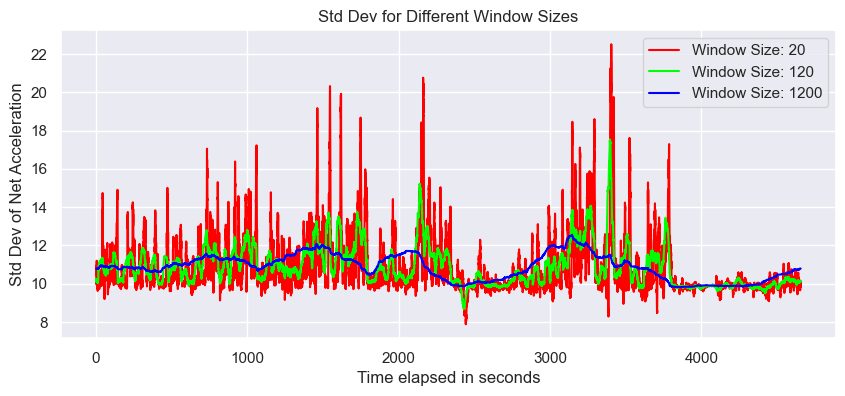

In [62]:
colors = ['#FF0000', '#00FF00', '#0000FF']
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 4))

time_interval = 0.25
time_values = np.arange(0, len(df) * time_interval, time_interval)

for i, window_size in enumerate(window_sizes):
    sns.lineplot(x=time_values[:len(averages[i])], y=averages[i], label=f'Window Size: {window_size}',color=colors[i])

plt.xlabel('Time elapsed in seconds')
plt.ylabel('Std Dev of Net Acceleration')
plt.title('Std Dev for Different Window Sizes')
plt.legend()
plt.show()

### Plot Activity Levels versus Time 

In [187]:
averages_20 = averages[0]  

# min_value = min(averages_20)
# max_value = max(averages_20)
# threshold_low = min_value + (max_value - min_value) * 0.33
threshold_high = np.float64(15.0)
threshold_low = np.float64(11)

# df['activity_level'] = np.where(averages_20 > threshold_high, 'High',
#                                 np.where(averages_20 > threshold_low, 'Medium', 'Low'))

df['activity_level'] = np.where(averages_20 > threshold_low, 'High', 'Low')


In [169]:
min(averages[0])
df['activity_level'].value_counts()

Low     12965
High     5664
Name: activity_level, dtype: int64

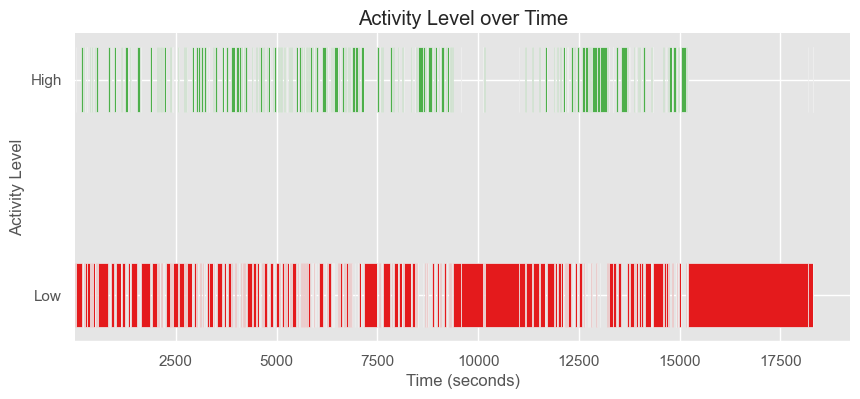

In [189]:
time_interval = 0.25
time_values = np.arange(0, len(df) * time_interval, time_interval)
activity_levels = df['activity_level']

unique_levels = activity_levels.unique()
colors = ['blue', 'orange', 'green']
colors = sns.color_palette("Set1")

fig, ax = plt.subplots(figsize=(10, 4))  
sns.despine(fig=fig, ax=ax, left=True)

leftstart = 1
for i in range(1, len(activity_levels)):
    if activity_levels[i] != activity_levels[i-1]:
        if activity_levels[i-1] == 'Low':
            ax.barh([0], [i+1-leftstart], height=0.03, color=colors[0], left=leftstart)
        elif activity_levels[i-1] == 'Medium':
            ax.barh([0.3], [i+1-leftstart], height=0.03, color=colors[1], left=leftstart)
        elif activity_levels[i-1] == 'High':
            ax.barh([0.1], [i+1-leftstart], height=0.03, color=colors[2], left=leftstart)
        leftstart = i

ax.set_yticks([0, 0.1])
ax.set_yticklabels(unique_levels)

ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Activity Level')
ax.set_title('Activity Level over Time')

plt.show()
